In [1]:
import json
from collections import defaultdict
import numpy as np
import pandas as pd
from nltk.corpus import wordnet as wn

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gloss_samples_file = '/Users/maxim_rachinskiy/Downloads/top_all_glosses.txt'
target_lemma = 'авторитет'

In [3]:
with open(gloss_samples_file) as f:
    gloss_samples = json.load(f)
    
#gloss_samples[0]

In [4]:
epochs = defaultdict(lambda: defaultdict(int))

for sample in gloss_samples:
    if sample['lemma'] != target_lemma:
        continue
    epochs[sample['glosses1'][0]['synset']]['epoch_1'] += 1
    epochs[sample['glosses2'][0]['synset']]['epoch_2'] += 1
        
synsets = epochs.keys()
epoch_1 = [similarity['epoch_1'] for similarity in epochs.values()]
epoch_2 = [similarity['epoch_2'] for similarity in epochs.values()]

epochs = pd.DataFrame({'synset': synsets, 'occurrence_1': epoch_1, 'occurrence_2': epoch_2})

epochs.head()

,synset,occurrence_1,occurrence_2
0,important.a.01,1,0
1,stock.n.09,4,8
2,upstanding.s.01,26,35
3,stature.n.01,0,3
4,uncle.n.02,1,0


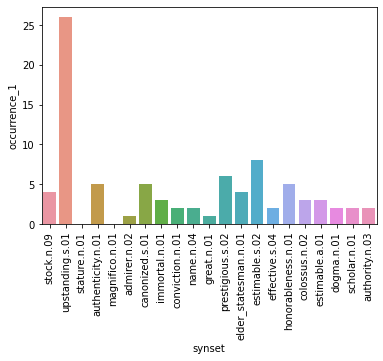

In [14]:
truncated_epochs = epochs[np.logical_or(epochs['occurrence_1'] > 1, epochs['occurrence_2'] > 1)]

sns.barplot(data=truncated_epochs, x='synset', y='occurrence_1')
plt.xticks(rotation=90);

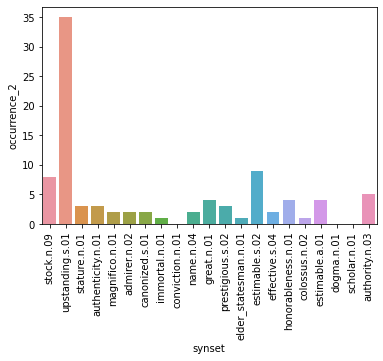

In [15]:
sns.barplot(data=truncated_epochs, x='synset', y='occurrence_2')
plt.xticks(rotation=90);

In [16]:
compare_epoch1_df = pd.DataFrame({
    'synset': truncated_epochs['synset'],
    'score': truncated_epochs['occurrence_1'],
    'epoch': 1
})
compare_epoch2_df = pd.DataFrame({
    'synset': truncated_epochs['synset'],
    'score': truncated_epochs['occurrence_2'],
    'epoch': 2
})

compare_epochs_df = pd.concat([compare_epoch1_df, compare_epoch2_df])
compare_epochs_df.head()

,synset,score,epoch
1,stock.n.09,4,1
2,upstanding.s.01,26,1
3,stature.n.01,0,1
7,authenticity.n.01,5,1
8,magnifico.n.01,0,1


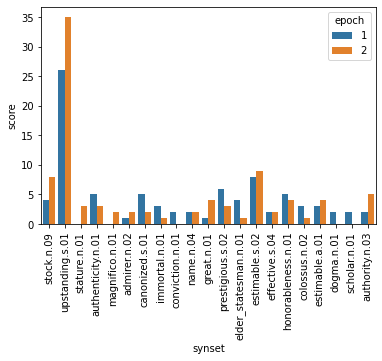

In [17]:
sns.barplot(data=compare_epochs_df, x='synset', y='score', hue='epoch')
plt.xticks(rotation=90);

In [18]:
glosses_df = pd.DataFrame({'synset': compare_epochs_df['synset'].unique()})
glosses_df['gloss'] = glosses_df['synset'].apply(lambda ss: wn.synset(ss).definition())
pd.set_option('display.max_colwidth', None)

glosses_df

,synset,gloss
0,stock.n.09,the reputation and popularity a person has
1,upstanding.s.01,meriting respect or esteem
2,stature.n.01,high level of respect gained by impressive development or achievement
3,authenticity.n.01,undisputed credibility
4,magnifico.n.01,a person of distinguished rank or appearance
5,admirer.n.02,a person who admires; someone who esteems or respects or approves
6,canonized.s.01,accorded sacrosanct or authoritative standing
7,immortal.n.01,a person (such as an author) of enduring fame
8,conviction.n.01,an unshakable belief in something without need for proof or evidence
9,name.n.04,a well-known or notable person


In [19]:
pd.set_option('display.max_colwidth', 50)